In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [150]:
missing_file_name = "landslide_data3_miss.csv"
original_file_name = "landslide_data3_original.csv"
df_missing = pd.read_csv(missing_file_name)
df_original = pd.read_csv(original_file_name)

- Target attribute is “stationid”, Drop the tuples (rows) having missing values in the target attribute. Print the total number of tuples deleted

In [151]:
df_missing_len_1 = len(df_missing.index)
for row in df_missing.iterrows():
	index = row[0]
	if pd.isna(row[1]["stationid"]):
		df_missing.drop(index, inplace=True)
print(f'Number of tuples deleted after dropping NaN stationid rows: {df_missing_len_1 - len(df_missing.index)}')

Number of tuples deleted after dropping NaN stationid rows: 19


-  Delete (drop) the tuples (rows) having equal to or more than one third of attributes with missing values. Print the total number of tuples deleted.

In [152]:
df_missing_len_2 = len(df_missing.index)
for row in df_missing.iterrows():
	count = 0
	index = row[0]
	for value in row[1]:
		if pd.isna(value):
			count += 1
	if count >= 3:
		df_missing.drop(index, inplace=True)
print(f'Number of tuples deleted after dropping rows having more than or equal to 3 attributes as NaN: {df_missing_len_2 - len(df_missing.index)}')

Number of tuples deleted after dropping rows having more than or equal to 3 attributes as NaN: 35


- After (b), count and print the number of missing values in each attributes.

In [153]:
missing_count = df_missing.isnull().sum()
missing_count

dates            0
stationid        0
temperature     34
humidity        13
pressure        41
rain             6
lightavgw/o0    15
lightmax         1
moisture         6
dtype: int64

- Also find and print the total number of missing values in the file (after the deletion of tuples).

In [154]:
count = 0
for value in missing_count:
	count += value
print(f"Total number of missing values after deletion in df are: {count}")

Total number of missing values after deletion in df are: 116


- Replace the missing values by mean of their respective attribute. (Use df.fillna() with suitable arguments.) 

In [155]:
df_missing_columns = [column for column in df_missing.columns if column != "dates" and column != "stationid"]
df_missing_replaced_by_mean = df_missing.copy()
for column in df_missing_columns:
	df_missing_replaced_by_mean[column].fillna(value=df_missing_replaced_by_mean[column].mean(), inplace=True)

- Compute the mean, median, mode and standard deviation for each attributes and compare the same with that of the original file.

In [156]:
columns_calculatable = ["temperature", "humidity", "pressure", "rain", "lightavgw/o0", "lightmax", "moisture"]
print("-----Mean-----")
print(df_missing_replaced_by_mean[columns_calculatable].mean())
print("-----Median-----")
print(df_missing_replaced_by_mean[columns_calculatable].median())
print("-----Mode-----")
print(df_missing_replaced_by_mean[columns_calculatable].mode())
print("-----Standard deviation-----")
print(df_missing_replaced_by_mean[columns_calculatable].std())

-----Mean-----
temperature        21.052444
humidity           83.125974
pressure         1009.465871
rain            10798.378825
lightavgw/o0     4458.297802
lightmax        21463.221348
moisture           32.602872
dtype: float64
-----Median-----
temperature       21.927010
humidity          91.000000
pressure        1014.482302
rain              15.750000
lightavgw/o0    1502.938500
lightmax        6569.000000
moisture          14.169500
dtype: float64
-----Mode-----
   temperature  humidity     pressure  rain  lightavgw/o0  lightmax  moisture
0    21.052444      99.0  1009.465871   0.0     4488.9103    4000.0       0.0
-----Standard deviation-----
temperature         4.339762
humidity           18.393926
pressure           45.855978
rain            24833.964919
lightavgw/o0     7606.283539
lightmax        21943.889293
moisture           33.714314
dtype: float64


In [157]:
print("-----Mean-----")
print(df_original[columns_calculatable].mean())
print("-----Median-----")
print(df_original[columns_calculatable].median())
print("-----Mode-----")
print(df_original[columns_calculatable].mode())
print("-----Standard deviation-----")
print(df_original[columns_calculatable].std())

-----Mean-----
temperature        21.214888
humidity           83.479932
pressure         1009.008774
rain            10701.538370
lightavgw/o0     4438.428453
lightmax        21788.623280
moisture           32.386053
dtype: float64
-----Median-----
temperature       22.272730
humidity          91.380950
pressure        1014.677832
rain              18.000000
lightavgw/o0    1656.880000
lightmax        6634.000000
moisture          16.704200
dtype: float64
-----Mode-----
   temperature  humidity    pressure  rain  lightavgw/o0  lightmax  moisture
0     12.72727      99.0  789.392692   0.0     4488.9103      4000       0.0
-----Standard deviation-----
temperature         4.355818
humidity           18.210065
pressure           46.980477
rain            24852.255288
lightavgw/o0     7573.162806
lightmax        22064.993089
moisture           33.653245
dtype: float64


- Calculate the root mean square error (RMSE) between the original and replaced values for each attribute. (Get original values from original file provided). Compute RMSE given by the equation at the end of the question. Plot these RMSE with respect to the attributes. 

In [158]:
from collections import defaultdict

def def_value():
    return 0
rmse_by_mean = defaultdict(def_value)
for index, value in df_missing_replaced_by_mean.iterrows():
	for column in columns_calculatable:
		x_a = value[column]
		x_b = df_original.loc[index, column]
		dif_square = (x_a - x_b)**2
		rmse_by_mean[column] += dif_square
for key in rmse_by_mean.keys():
	rmse_by_mean[key] /= len(df_missing_replaced_by_mean)
	rmse_by_mean[key] = rmse_by_mean[key] ** (1/2)
print("RMSE for data frame replaced NaN by mean of their respective column")
rmse_by_mean

RMSE for data frame replaced NaN by mean of their respective column


defaultdict(<function __main__.def_value()>,
            {'temperature': 0.7144187028105025,
             'humidity': 0.8398642934872268,
             'pressure': 4.517467372728017,
             'rain': 864.8760413101818,
             'lightavgw/o0': 266.7011335700478,
             'lightmax': 315.741964846385,
             'moisture': 3.0372627080150996})

- Plot these RMSE with respect to the attributes. 

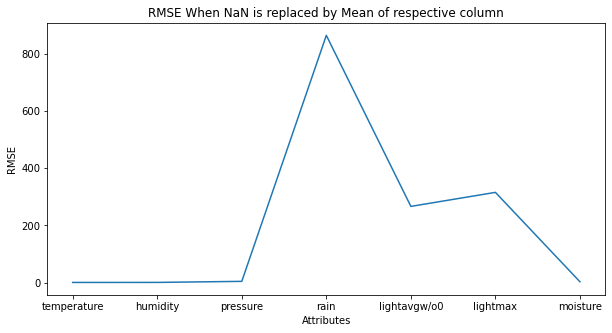

In [159]:
x = pd.Series(rmse_by_mean.keys())
y = pd.Series(rmse_by_mean.values())
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xlabel("Attributes")
plt.ylabel("RMSE")
plt.title("RMSE When NaN is replaced by Mean of respective column")
plt.show()

- Replace the missing values in each attribute using the linear interpolation technique. Use df.interpolate() with suitable arguments.

In [160]:
df_missing_interpolate = df_missing.copy()
df_missing_interpolate.interpolate(inplace=True, method="linear")

- Compute the mean, median, mode and standard deviation for each attributes and compare with that of the original file.

In [161]:
print("-----Mean-----")
print(df_missing_interpolate[columns_calculatable].mean())
print("-----Median-----")
print(df_missing_interpolate[columns_calculatable].median())
print("-----Mode-----")
print(df_missing_interpolate[columns_calculatable].mode())
print("-----Standard deviation-----")
print(df_missing_interpolate[columns_calculatable].std())

-----Mean-----
temperature        21.114539
humidity           83.165602
pressure         1009.968097
rain            10727.959186
lightavgw/o0     4496.753851
lightmax        21473.799102
moisture           32.528672
dtype: float64
-----Median-----
temperature       22.139860
humidity          91.179860
pressure        1014.925145
rain              15.750000
lightavgw/o0    1500.500000
lightmax        6569.000000
moisture          13.894400
dtype: float64
-----Mode-----
   temperature  humidity    pressure  rain  lightavgw/o0  lightmax  moisture
0     12.72727      99.0  789.392692   0.0     4488.9103    4000.0       0.0
-----Standard deviation-----
temperature         4.398734
humidity           18.408275
pressure           45.999033
rain            24848.714822
lightavgw/o0     7649.457776
lightmax        21946.160719
moisture           33.791063
dtype: float64


In [162]:
print("-----Mean-----")
print(df_original[columns_calculatable].mean())
print("-----Median-----")
print(df_original[columns_calculatable].median())
print("-----Mode-----")
print(df_original[columns_calculatable].mode())
print("-----Standard deviation-----")
print(df_original[columns_calculatable].std())

-----Mean-----
temperature        21.214888
humidity           83.479932
pressure         1009.008774
rain            10701.538370
lightavgw/o0     4438.428453
lightmax        21788.623280
moisture           32.386053
dtype: float64
-----Median-----
temperature       22.272730
humidity          91.380950
pressure        1014.677832
rain              18.000000
lightavgw/o0    1656.880000
lightmax        6634.000000
moisture          16.704200
dtype: float64
-----Mode-----
   temperature  humidity    pressure  rain  lightavgw/o0  lightmax  moisture
0     12.72727      99.0  789.392692   0.0     4488.9103      4000       0.0
-----Standard deviation-----
temperature         4.355818
humidity           18.210065
pressure           46.980477
rain            24852.255288
lightavgw/o0     7573.162806
lightmax        22064.993089
moisture           33.653245
dtype: float64


- Calculate the root mean square error (RMSE) between the original and replaced values for each attributes. (Get original values from the original file provided). Compute RMSE given by the equation at the end of the question

In [163]:
from collections import defaultdict

def def_value():
    return 0
rmse_by_interpolation = defaultdict(def_value)
for index, value in df_missing_interpolate.iterrows():
	for column in columns_calculatable:
		x_a = value[column]
		x_b = df_original.loc[index, column]
		dif_square = (x_a - x_b)**2
		rmse_by_interpolation[column] += dif_square
for key in rmse_by_interpolation.keys():
	rmse_by_interpolation[key] /= len(df_missing_interpolate)
	rmse_by_interpolation[key] = rmse_by_interpolation[key] ** (1/2)
print("RMSE for data frame replaced NaN by linear interpolation: ")
rmse_by_interpolation

RMSE for data frame replaced NaN by linear interpolation: 


defaultdict(<function __main__.def_value()>,
            {'temperature': 0.25969769280241406,
             'humidity': 0.7638424373996978,
             'pressure': 1.3257821563126702,
             'rain': 19.154315025364625,
             'lightavgw/o0': 950.911890487612,
             'lightmax': 0.0,
             'moisture': 1.266179276489091})

- Plot this RMSE with respect to the attributes.

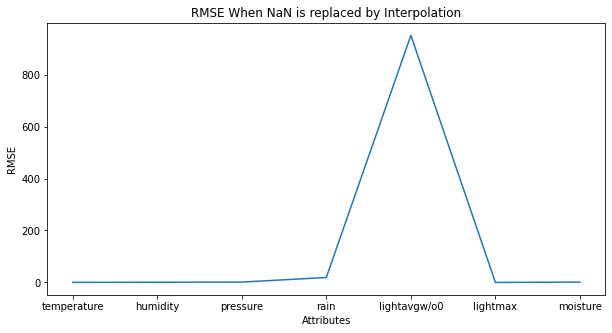

In [164]:
x = pd.Series(rmse_by_interpolation.keys())
y = pd.Series(rmse_by_interpolation.values())
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xlabel("Attributes")
plt.ylabel("RMSE")
plt.title("RMSE When NaN is replaced by Interpolation")
plt.show()

 - After replacing the missing values by interpolation method, find and list the outliers in the attributes “temperature” and “rain”. Outliers are the values that do not satisfy the condition (Q1 – (1.5 * IQR)) < x < (Q3 + (1.5 * IQR)), where x is the value of the attribute, IQR is the interquartile range, Q1 and Q3 are the first and third quartiles.

In [165]:

def detect_outliers(df, columns=[]):
	for column in columns:
		Q1 = np.quantile(df[column], 0.25)
		Q3 = np.quantile(df[column], 0.75)
		IQR = Q3 - Q1
		lower_range = Q1 - 1.5 * IQR
		upper_range = Q3 + 1.5 * IQR
		outliers = df[(df[column] < lower_range) | (df[column] > upper_range)]
		print(f"Outliers of {column}: ")
		print(outliers.head())

In [166]:
detect_outliers(df_missing_interpolate, ["temperature", "rain"])

Outliers of temperature: 
          dates stationid  temperature  humidity     pressure  rain  \
509  16-11-2018       t15       7.6729   67.8972  1022.555421   0.0   
510  17-11-2018       t15       7.6729   67.8972  1020.869643   0.0   
511  18-11-2018       t15       7.6729   67.8972  1022.956262   0.0   
512  19-11-2018       t15       7.6729   67.8972  1026.069680   0.0   
513  20-11-2018       t15       7.6729   67.8972  1026.240417   0.0   

     lightavgw/o0  lightmax  moisture  
509      417.0392    4000.0    8.1028  
510      417.0392    4000.0    7.9286  
511      417.0392    4000.0    7.9159  
512      417.0392    4000.0    7.0560  
513      417.0392    4000.0    7.0000  
Outliers of rain: 
          dates stationid  temperature  humidity     pressure      rain  \
135  10-07-2018       t11     27.88806  75.07463   893.677537  13583.25   
199  18-07-2018       t12     25.97674  88.37209  1008.658915  15459.75   
200  19-07-2018       t12     27.40000  84.14815  1008.095556  

- Obtain the boxplot for these attributes.

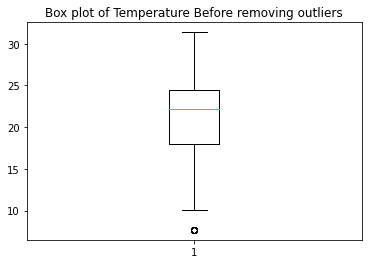

In [167]:
plt.title("Box plot of Temperature Before removing outliers")
plt.boxplot(df_missing_interpolate["temperature"])
plt.show()

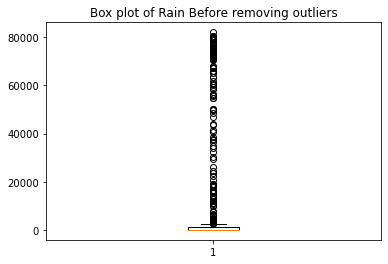

In [168]:
plt.title("Box plot of Rain Before removing outliers")
plt.boxplot(df_missing_interpolate["rain"])
plt.show()

- Replace these outliers with the median of the attribute.

In [169]:
def replace_outliers(df, columns=[]):
	for column in columns:
		Q1 = np.quantile(df[column], 0.25)
		Q3 = np.quantile(df[column], 0.75)
		IQR = Q3 - Q1
		lower_range = Q1 - 1.5 * IQR
		upper_range = Q3 + 1.5 * IQR
		median = df[column].median()
		df[column] = np.where((df[column] > lower_range) & (df[column] < upper_range), df[column], median)

In [170]:
replace_outliers(df_missing_interpolate, ["temperature", "rain"])

- Plot the boxplot again and observe the difference with that of the boxplot from the previous box in (i)

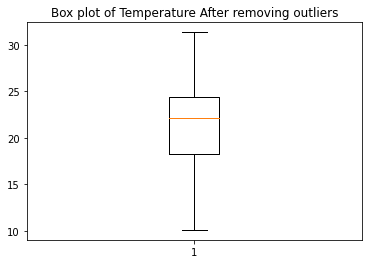

In [171]:
plt.title("Box plot of Temperature After removing outliers")
plt.boxplot(df_missing_interpolate["temperature"])
plt.show()

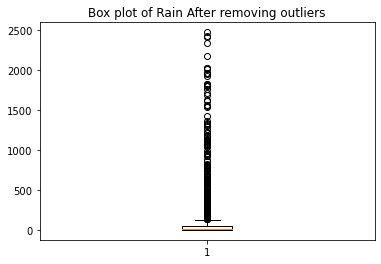

In [172]:
plt.title("Box plot of Rain After removing outliers")
plt.boxplot(df_missing_interpolate["rain"])
plt.show()

- We still get some outliers in rain column even though replacing it by the median cause may be median is more affected the by the outliers present in the column before replacing them. Like there are more outliers around the value of median.